In [7]:
import pandas
import numpy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
import seaborn
from sklearn.linear_model import Perceptron
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape, Conv1D, MaxPooling1D, Flatten, Dense, LSTM

Данные о качестве (вкусе) яблок. В основном предоставлены Американскими агрокультурными компаниями.

Загрузка данных

In [8]:
data = pandas.read_csv('data/apple_quality.csv')
data = data.drop(['A_id'], axis=1)
data = data.dropna()

Преобразование целевой переменной

In [9]:
le = LabelEncoder()
data['Quality'] = data['Quality'].apply(lambda x: 1 if x == 'good' else 0)
y = le.fit_transform(data['Quality'])
x = data.drop(['Quality'], axis=1)

Разделение данных

In [10]:
x = StandardScaler().fit_transform(x) 
x_reshaped = x.reshape(x.shape[0], x.shape[1], 1)  # (samples, features, 1)

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=1, stratify=y) # Выделяет 20% данных в качестве тестовых, 80% в качестве данных для обучения, сохраняет соотношение "хороших" и "плохих" яблок (за счет stratify=y)

CNN

In [11]:
cnn = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(x.shape[1], 1)), # Cверточный слой для 1D-данных
    MaxPooling1D(2), # Уменьшает размер данных, оставляя только самые важные признаки.
    Conv1D(64, kernel_size=2, activation='relu'), # Второй сверточный слой с 64 фильтрами и окном размера 2, учится находить более сложные паттерны.
    Flatten(), # Преобразует многомерные данные в одномерный вектор.
    Dense(32, activation='relu'), # Полносвязный слой с 32 нейронами. Здесь нейроны анализируют все признаки сразу, чтобы принять решение.
    Dense(1, activation='sigmoid') # Выходной слой с 1 нейроном. Сигмоида (sigmoid) преобразует выход в число от 0 до 1
])

cnn.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

/Users/karpova.eo/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Обучение CNN

In [12]:
history_cnn = cnn.fit(
    x_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6644 - loss: 0.6489 - val_accuracy: 0.7125 - val_loss: 0.5581
Epoch 2/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - accuracy: 0.7482 - loss: 0.5352 - val_accuracy: 0.7672 - val_loss: 0.4864
Epoch 3/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - accuracy: 0.8030 - loss: 0.4346 - val_accuracy: 0.8000 - val_loss: 0.4217
Epoch 4/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step - accuracy: 0.8259 - loss: 0.3881 - val_accuracy: 0.8016 - val_loss: 0.3871
Epoch 5/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - accuracy: 0.8342 - loss: 0.3690 - val_accuracy: 0.8125 - val_loss: 0.3950
Epoch 6/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - accuracy: 0.8259 - loss: 0.3653 - val_accuracy: 0.8219 - val_loss: 0.3716
Epoch 7/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - accuracy: 0.8329 - loss: 0.3412 - val_accuracy: 0.8141 - val_loss: 0.3718
Epoch 8/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - accuracy: 0.8397 - loss: 0.3353 - val_accuracy: 0.80

RNN

In [27]:
rnn = Sequential([
    Reshape((x.shape[1], 1)), 
    LSTM(128, return_sequences=True),
    LSTM(32),
    Dense(1, activation='sigmoid')
])

rnn.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

Обучение RNN

In [28]:
history_rnn = rnn.fit(
    x_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6209 - loss: 0.6516 - val_accuracy: 0.7031 - val_loss: 0.5704
Epoch 2/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7064 - loss: 0.5692 - val_accuracy: 0.7109 - val_loss: 0.5516
Epoch 3/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7106 - loss: 0.5581 - val_accuracy: 0.7109 - val_loss: 0.5352
Epoch 4/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7043 - loss: 0.5483 - val_accuracy: 0.7063 - val_loss: 0.5307
Epoch 5/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7225 - loss: 0.5277 - val_accuracy: 0.7281 - val_loss: 0.5088
Epoch 6/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7158 - loss: 0.5141 - val_accuracy: 0.7375 - val_loss: 0.4997
Epoch 7/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7414 - loss: 0.4848 - val_accuracy: 0.7531 - val_loss: 0.4919
Epoch 8/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7538 - loss: 0.4679 - val_accuracy: 0.7688 - val_loss:

Оценка методов

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step
CNN:
Accuracy: 0.860

              precision    recall  f1-score   support

         bad       0.85      0.88      0.86       399
        good       0.87      0.84      0.86       401

    accuracy                           0.86       800
   macro avg       0.86      0.86      0.86       800
weighted avg       0.86      0.86      0.86       800


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
RNN:
Accuracy: 0.894

              precision    recall  f1-score   support

         bad       0.89      0.90      0.89       399
        good       0.90      0.89      0.89       401

    accuracy                           0.89       800
   macro avg       0.89      0.89      0.89       800
weighted avg       0.89      0.89      0.89       800




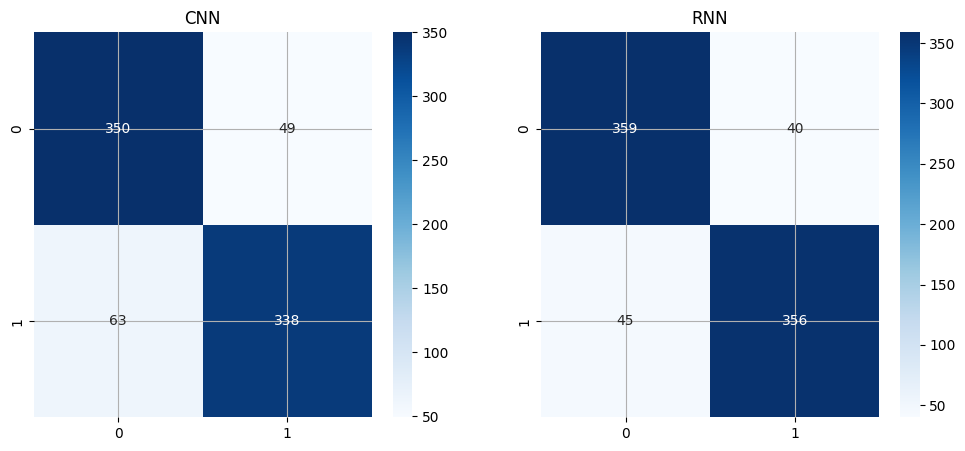

In [29]:
def evaluate_model(name, model, x_test, plot_config):
    plt.subplot(plot_config)
    
    # Получаем вероятности классов
    y_pred_proba = model.predict(x_test)
    
    # Преобразуем вероятности в бинарные метки (0 или 1)
    y_pred = numpy.round(y_pred_proba).astype(int)

    print(name + ":")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}\n")

    print(classification_report(y_test, y_pred, target_names=["bad", "good"]))

    print()

    plt.title(name)
    
    cm = confusion_matrix(y_test, y_pred)
    seaborn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.grid()

plt.figure(figsize=(12, 5))

evaluate_model("CNN", cnn, x_test, 121)
evaluate_model("RNN", rnn, x_test, 122)

# precision - точность, сколько из определенных "плохими" яблок действительно плохие
# recall - полнота, сколько модель нашла действительно "плохих" яблок
# f1-score - общий показатель на основе precision и recall